# TensorFlow

Installing TensorFlow: `conda install -c conda-forge tensorflow`

## 1. Hello Tensor World! 

In [1]:
import tensorflow as tf

# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


### a) Tensor

In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of `hello_constant = tf.constant('Hello World!')`, `hello_constant` is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below: 

```python

# A is a 0-dimensional int32 tensor
A = tf.constant(1234) 
# B is a 1-dimensional int32 tensor
B = tf.constant([123,456,789]) 
# C is a 2-dimensional int32 tensor
C = tf.constant([ [123,456,789], [222,333,444] ])

```

`tf.constant()` is one of many TensorFlow operations you will use in this lesson. The tensor returned by `tf.constant()` is called a constant tensor, because the value of the tensor never changes.



### b) Session

TensorFlow’s api is built around the idea of a computational graph, a way of visualizing a mathematical process which you learned about in the MiniFlow lesson. Let’s take the TensorFlow code you ran and turn that into a graph:

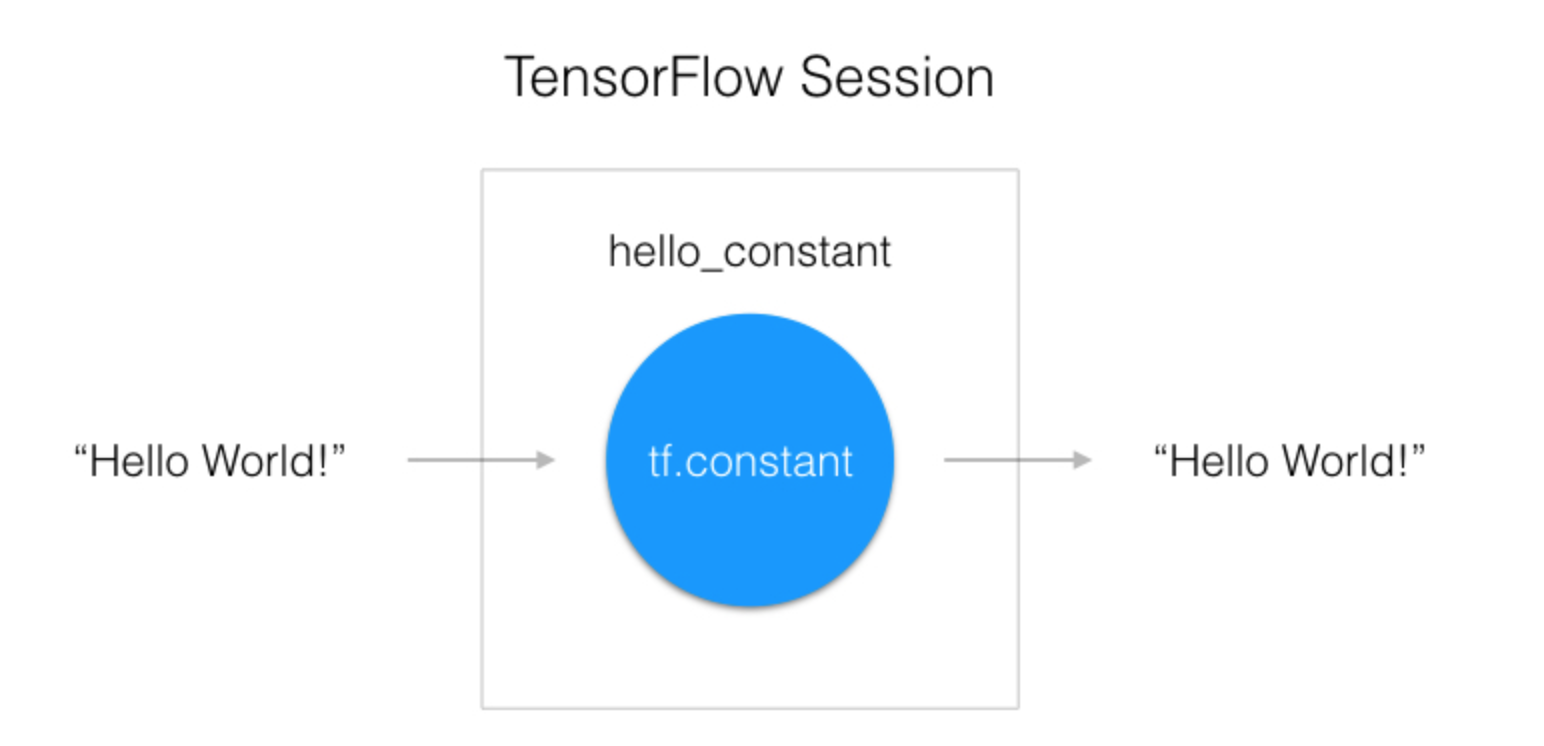

A "TensorFlow Session", as shown above, is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines. Let’s see how you use it.

```

with tf.Session() as sess:
    output = sess.run(hello_constant)
    print(output)
    
```

The code has already created the tensor, `hello_constant`, from the previous lines. The next step is to evaluate the tensor in a session.

The code creates a session instance, `sess`, using `tf.Session`. The `sess.run()` function then evaluates the tensor and returns the results.

After you run the above, you will see the following printed out: 

```

'Hello World!'

```



## 2. TensorFlow Input

In the last section, you passed a tensor into a session and it returned the result. What if you want to use a **non-constant**? This is where `tf.placeholder()` and `feed_dict` come into place. In this section, you'll go over the basics of feeding data into TensorFlow. 

### a) [tf.placeholder() ](https://www.tensorflow.org/api_docs/python/tf/placeholder)

Sadly you can’t just set `x` to your dataset and put it in TensorFlow, because over time you'll want your TensorFlow model to take in different datasets with different parameters. You need `tf.placeholder()`!

`tf.placeholder()` returns a tensor that gets its value from data passed to the `tf.session.run()` function, allowing you to set the input right before the session runs.

### b) Session’s feed_dict

```python

x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello World'})
    
```

Use the `feed_dict` parameter in `tf.session.run()` to set the placeholder tensor. The above example shows the tensor `x` being set to the string `"Hello, world"`. It's also possible to set more than one tensor using `feed_dict` as shown below.

```python

x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Test String', y: 123, z: 45.67})

```

**Note**: If the data passed to the `feed_dict` doesn’t match the tensor type and can’t be cast into the tensor type, you’ll get the error “`ValueError: invalid literal for`...”.

### Quiz

Let's see how well you understand `tf.placeholder()` and `feed_dict`. The code below throws an error, but I want you to make it return the number `123`. Change line 11, so that the code returns the number `123`.

In [1]:
import tensorflow as tf

def run():
    output = None
    x = tf.placeholder(tf.int32)

    with tf.Session() as sess:
        output = sess.run(x, feed_dict={x: 123})

    return output

print(run())

123


## 3. TensorFlow Math

Getting the input is great, but now you need to use it. You're going to use basic math functions that everyone knows and loves - add, subtract, multiply, and divide - with tensors. 

### a) Addition

```python

x = tf.add(5, 2)  # 7

```

### b) Subtraction and Multiplication

```python

x = tf.subtract(10, 4) # 6
y = tf.multiply(2, 5)  # 10

```

The `x` tensor will evaluate to `6`, because `10 - 4 = 6`. The `y` tensor will evaluate to `10`, because `2 * 5 = 10`. That was easy!

### c) Division

`tf.divide(x, y)`

### d) Converting types

It may be necessary to convert between types to make certain operators work together. For example, if you tried the following, it would fail with an exception:

```python

tf.subtract(tf.constant(2.0),tf.constant(1))  # Fails with ValueError: Tensor conversion requested dtype float32 for Tensor with dtype int32: 

```

That's because the constant `1` is an integer but the constant `2.0` is a floating point value and `subtract` expects them to match.

In cases like these, you can either make sure your data is all of the same type, or you can cast a value to another type. In this case, converting the `2.0` to an integer before subtracting, like so, will give the correct result:

```python

tf.subtract(tf.cast(tf.constant(2.0), tf.int32), tf.constant(1))   # 1

```

### d) Quiz 

Let's apply what you learned to convert an algorithm to TensorFlow. The code below is a simple algorithm using division and subtraction. Convert the following algorithm in regular Python to TensorFlow and print the results of the session. You can use `tf.constant()` for the values `10`, `2`, and `1`.

In [3]:
import tensorflow as tf

# TODO: Convert the following to TensorFlow:
x = 10
y = 2
z = x/y - 1

x = tf.constant(10)
y = tf.constant(2)
z = tf.subtract(tf.divide(x, y), tf.cast(tf.constant(1), tf.float64))

# TODO: Print z from a session as the variable output
with tf.Session() as sess:
    output = sess.run(z)
    print(output)

4.0


## 4. TensorFlow Linear Function

Let’s derive the function `y = Wx + b`. We want to translate our input, `x`, to labels, `y`.

For example, imagine we want to classify images as digits.

x would be our list of pixel values, and `y` would be the logits, one for each digit. Let's take a look at `y = Wx`, where the weights, `W`, determine the influence of `x` at predicting each `y`. 

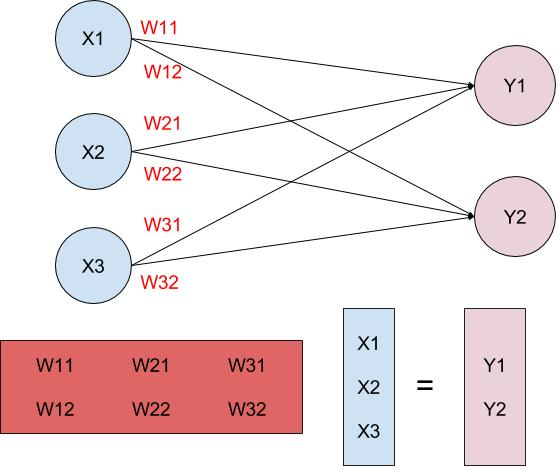

`y = Wx` allows us to segment the data into their respective labels using a line.

However, this line has to pass through the origin, because whenever `x` equals 0, then `y` is also going to equal 0.

We want the ability to shift the line away from the origin to fit more complex data. The simplest solution is to add a number to the function, which we call “bias”.

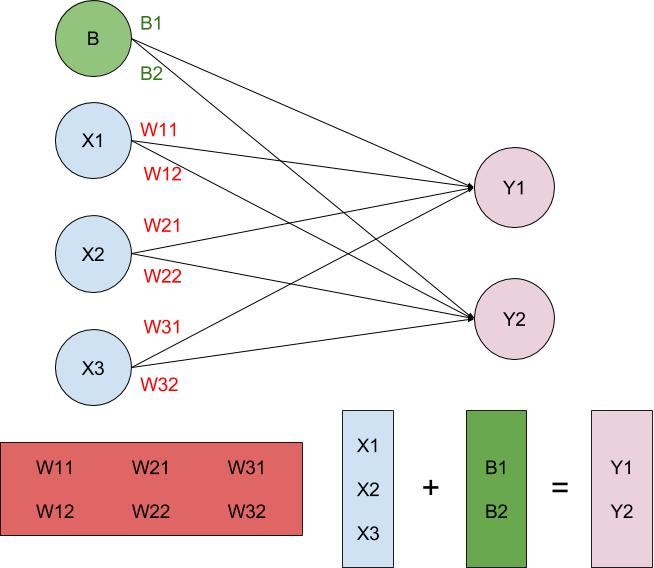

Our new function becomes `Wx + b`, allowing us to create predictions on linearly separable data. Let’s use a concrete example and calculate the logits.

### a) Matrix Multiplication Quiz

Calculate the logits a and b for the following formula.

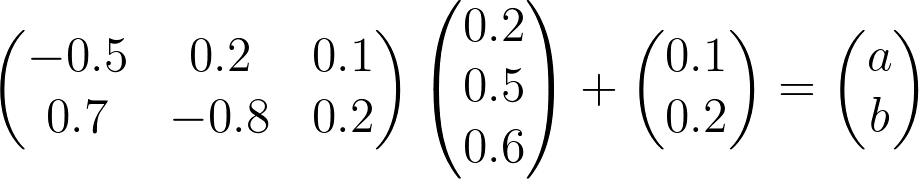 

answers: a = 0.16, b = 0.06

### b) Transposition

We've been using the `y = Wx + b` function for our linear function.

But there's another function that does the same thing, `y = xW + b`. These functions do the same thing and are interchangeable, except for the dimensions of the matrices involved.

To shift from one function to the other, you simply have to swap the row and column dimensions of each matrix. This is called transposition.

For rest of this lesson, we actually use `xW + b`, because this is what TensorFlow uses.

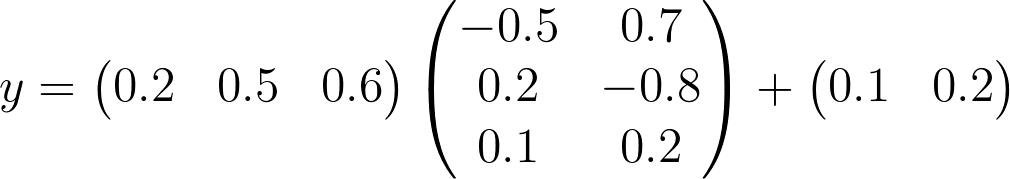

The above example is identical to the quiz you just completed, except that the matrices are transposed.

`x` now has the dimensions 1x3, `W` now has the dimensions 3x2, and `b` now has the dimensions 1x2. Calculating this will produce a matrix with the dimension of 1x2.

You'll notice that the elements in this 1x2 matrix are the same as the elements in the 2x1 matrix from the quiz. Again, these matrices are simply transposed.

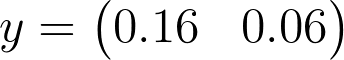

We now have our logits! The columns represent the logits for our two labels.

Now you can learn how to train this function in TensorFlow.


## 5. Weights and Bias in TensorFlow

The goal of training a neural network is to modify weights and biases to best predict the labels. In order to use weights and bias, you'll need a Tensor that can be modified. This leaves out `tf.placeholder()` and `tf.constant()`, since those Tensors can't be modified. This is where `tf.Variable` class comes in.

### a) tf.Variable()

```python

x = tf.Variable(5)

```

The `tf.Variable` class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session, so you must initialize the state of the tensor manually. You'll use the `tf.global_variables_initializer()` function to initialize the state of all the Variable tensors.

#### Initialization

```python

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

```

The `tf.global_variables_initializer()` call returns an operation that will initialize all TensorFlow variables from the graph. You call the operation using a session to initialize all the variables as shown above. Using the `tf.Variable` class allows us to change the weights and bias, but **an initial value needs to be chosen**.

Initializing the weights with random numbers from a normal distribution is good practice. Randomizing the weights helps the model from becoming stuck in the same place every time you train it. You'll learn more about this in the next lesson, when you study gradient descent.

Similarly, choosing weights from a normal distribution prevents any one weight from overwhelming other weights. You'll use the `tf.truncated_normal()` function to generate random numbers from a normal distribution.

### b) tf.truncated_normal()

```python

n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

```

The `tf.truncated_normal()` function returns a tensor with random values from a normal distribution whose magnitude is no more than 2 standard deviations from the mean.

Since the weights are already helping prevent the model from getting stuck, you don't need to randomize the bias. Let's use the simplest solution, setting the bias to 0.

### c) tf.zeros()

```python

n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))

```

The `tf.zeros()` function returns a tensor with all zeros.


## 6. Linear Classifier Quiz

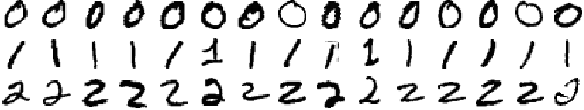

You'll be classifying the handwritten numbers `0`, `1`, and `2` from the MNIST dataset using TensorFlow. The above is a small sample of the data you'll be training on. Notice how some of the `1`s are written with a serif at the top and at different angles. The similarities and differences will play a part in shaping the weights of the model.

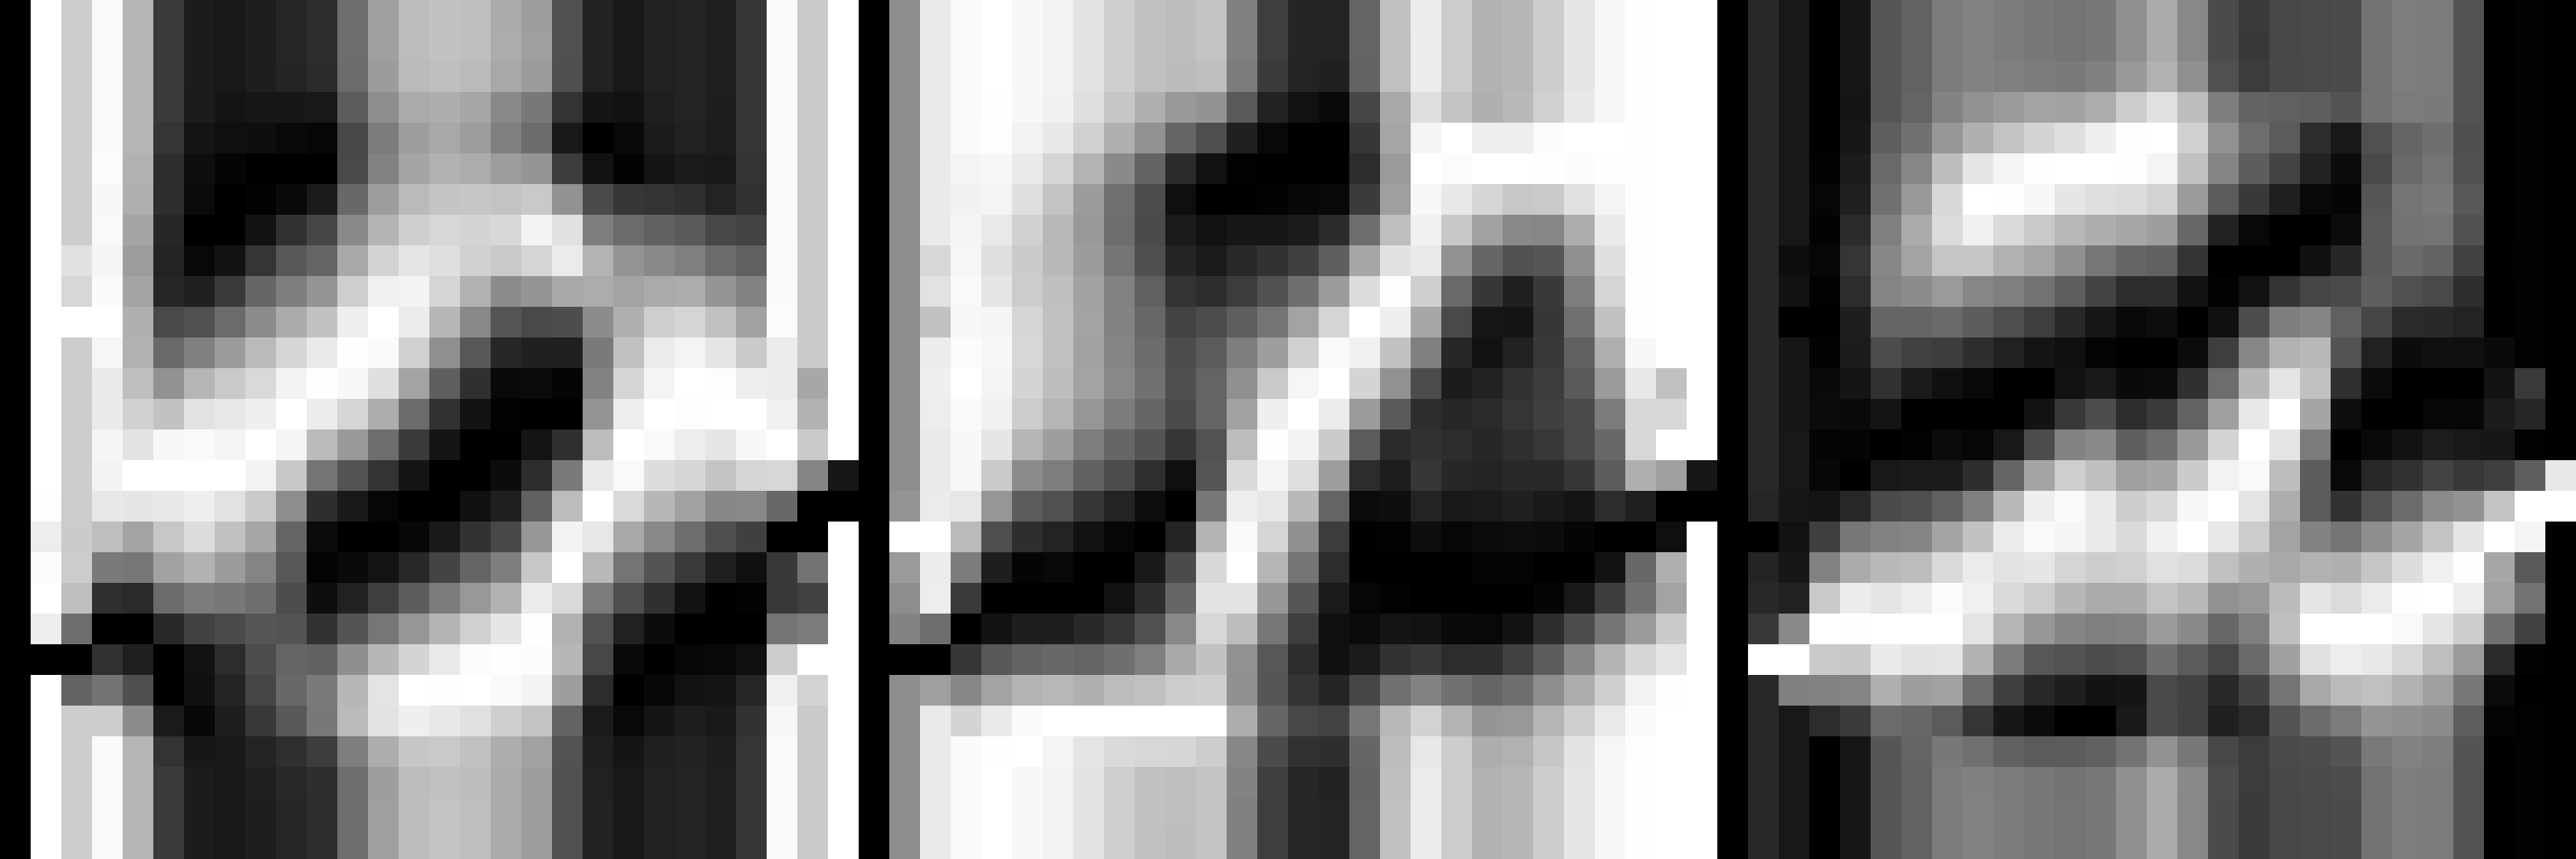

The images above are trained weights for each label (0, 1, and 2). The weights display the unique properties of each digit they have found. Complete this quiz to train your own weights using the MNIST dataset.

### Instructions

1. Open quiz.py.
    1. Implement `get_weights` to return a `tf.Variable` of weights
    2. Implement `get_biases` to return a `tf.Variable of biases`
    3. Implement `xW + b` in the `linear` function

2. Open sandbox.py
    1. Initialize all weights

Since `xW` in `xW + b` is matrix multiplication, you have to use the `tf.matmul()` function instead of `tf.multiply()`. Don't forget that order matters in matrix multiplication, so `tf.matmul(a,b)` is not the same as `tf.matmul(b,a)`.

```python
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

from tensorflow.examples.tutorials.mnist import input_data

def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))

```

## 6. Linear Update

You can’t train a neural network on a single sample. Let’s apply n samples of `x` to the function `y = Wx + b`, which becomes `Y = WX + B`.

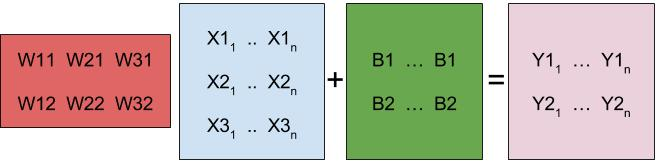

For every sample of `X` (`X1`, `X2`, `X3`), we get logits for label 1 (`Y1`) and label 2 (`Y2`).

In order to add the bias to the product of `WX`, we had to turn `b` into a matrix of the same shape. This is a bit unnecessary, since the bias is only two numbers. It should really be a vector.

We can take advantage of an operation called broadcasting used in TensorFlow and Numpy. This operation allows arrays of different dimension to be added or multiplied with each other. For example:

```python

import numpy as np
t = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
u = np.array([1, 2, 3])
print(t + u)

```

The code above will print...

```python

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]
 [11 13 15]]

```

This is because `u` is the same dimension as the last dimension in `t`.

## 7. Softmax

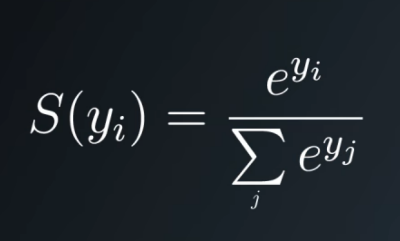

Congratulations on successfully implementing a linear function that outputs logits. You're one step closer to a working classifier.

The next step is to assign a probability to each label, which you can then use to classify the data. Use the softmax function to turn your logits into probabilities.

We can do this by using the formula above, which uses the input of y values and the mathematical constant "e" which is approximately equal to 2.718. By taking "e" to the power of any real value we always get back a positive value, this then helps us scale when having negative y values. The summation symbol on the bottom of the divisor indicates that we add together all the e^(input y value) elements in order to get our calculated probability outputs.

### Quiz

For the next quiz, you'll implement a `softmax(x)` function that takes in `x`, a one or two dimensional array of logits.

In the one dimensional case, the array is just a single set of logits. In the two dimensional case, each column in the array is a set of logits. The `softmax(x)` function should return a NumPy array of the same shape as `x`.

For example, given a one-dimensional array:

```python

# logits is a one-dimensional array with 3 elements
logits = [1.0, 2.0, 3.0]
# softmax will return a one-dimensional array with 3 elements
print softmax(logits)

```

```python

[ 0.09003057  0.24472847  0.66524096]

```

Given a two-dimensional array where each column represents a set of logits:

```python

# logits is a two-dimensional array
logits = np.array([
    [1, 2, 3, 6],
    [2, 4, 5, 6],
    [3, 8, 7, 6]])
# softmax will return a two-dimensional array with the same shape
print softmax(logits)

```

```python

[
    [ 0.09003057  0.00242826  0.01587624  0.33333333]
    [ 0.24472847  0.01794253  0.11731043  0.33333333]
    [ 0.66524096  0.97962921  0.86681333  0.33333333]
]
  
```

Implement the softmax function, which is specified by the formula at the top of the page.

The probabilities for each column must sum to 1. Feel free to test your function with the inputs above.



In [8]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

logits = [3.0, 1.0, 0.2]
print(softmax(logits))


[0.8360188  0.11314284 0.05083836]


## 8. TensorFlow Softmax

Now that you've built a softmax function from scratch, let's see how softmax is done in TensorFlow.

```python

x = tf.nn.softmax([2.0, 1.0, 0.2])

```

Easy as that! `tf.nn.softmax()` implements the softmax function for you. It takes in logits and returns softmax activations.

### Quiz

Use the softmax function in the quiz below to return the softmax of the logits.

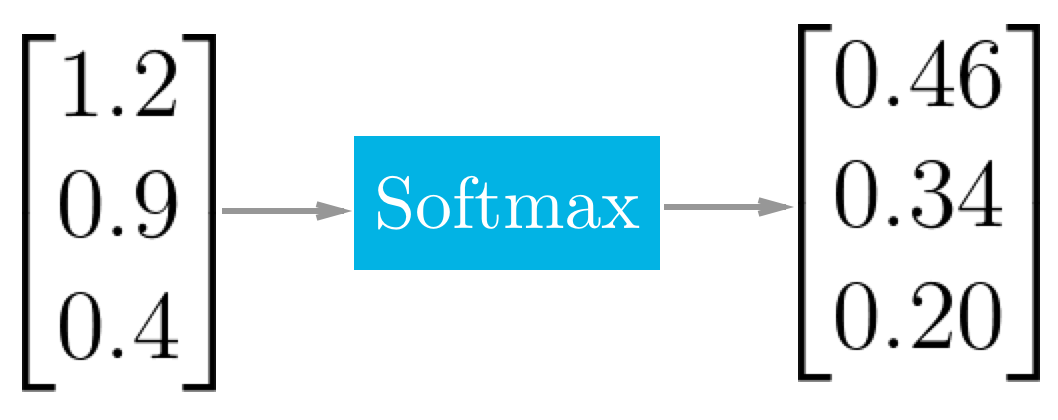

In [9]:
import tensorflow as tf

def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)

    softmax = tf.nn.softmax(logits)

    with tf.Session() as sess:
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output

## 9. Corss Entropy

### Minimizing Cross Entropy

## 10. Practical Aspect of Learning

### a) How do you fill image pixels to this classifier?

#### i) Numerical Stablility

Adding small numbers to big numbers cause issues

#### ii) Normalized Inputs and Initial Weights

1. Inputs:

    1. Zero Mean
    2. Equal Variance(Small)

2. Initial Weights
    
    1. Random
    2. Mean = 0
    3. Equal Variance(Small)
    
#### iii) Measuring Performance

Traning Set

Validation Set

Testing Set

#### iv) Validation and Test Set Size

Cross-Validation

Rule of '30'

### b) Where do you initialize the optimization?

Training Logistic Regression:

Optimizes error measure (Loss Function)

Scaling Issues

#### i) Stochastic Gradient Descent (S.G.D.)

Computing gradient descent takes about 3X than computing the loss function

Take a very small sliver of the training data, compute the loss and derivative, and use as direction

#### ii) Momentum and Learning Rate Decay

Keep a running average of the gradients and use that running average instead of the direction of the current batch of the data

Make learing rate samller and smaller as you train

#### iii) Hyperparameter

Initial Learing Rate

Learing Rate Decay

Momentum

Batch Size

Weight Initialization

**ADAGRAD** Approach

### Quiz 2: Mini-batch

Let's use mini-batching to feed batches of MNIST features and labels into a linear model.

Set the batch size and run the optimizer over all the batches with the `batches` function. The recommended batch size is 128. If you have memory restrictions, feel free to make it smaller.

```python

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
from helper import batches

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# TODO: Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # TODO: Train optimizer on all batches
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

```

Outputs:

```python
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /datasets/ud730/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz
Test Accuracy: 0.1454000025987625

```

The accuracy is low, but you probably know that you could train on the dataset more than once. You can train a model using the dataset multiple times. You'll go over this subject in the next section where we talk about "epochs".

## 11. Epochs

An epoch is a single forward and backward pass of the whole dataset. This is used to increase the accuracy of the model without requiring more data. This section will cover epochs in TensorFlow and how to choose the right number of epochs.

The following TensorFlow code trains a model using 10 epochs.

```python
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
from helper import batches  # Helper function created in Mini-batching section


def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features: last_features, labels: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

batch_size = 128
epochs = 10
learn_rate = 0.001

train_batches = batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch_i in range(epochs):

        # Loop over all batches
        for batch_features, batch_labels in train_batches:
            train_feed_dict = {
                features: batch_features,
                labels: batch_labels,
                learning_rate: learn_rate}
            sess.run(optimizer, feed_dict=train_feed_dict)

        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

```

Running the code will output the following:

```python
Epoch: 0    - Cost: 11.0     Valid Accuracy: 0.204
Epoch: 1    - Cost: 9.95     Valid Accuracy: 0.229
Epoch: 2    - Cost: 9.18     Valid Accuracy: 0.246
Epoch: 3    - Cost: 8.59     Valid Accuracy: 0.264
Epoch: 4    - Cost: 8.13     Valid Accuracy: 0.283
Epoch: 5    - Cost: 7.77     Valid Accuracy: 0.301
Epoch: 6    - Cost: 7.47     Valid Accuracy: 0.316
Epoch: 7    - Cost: 7.2      Valid Accuracy: 0.328
Epoch: 8    - Cost: 6.96     Valid Accuracy: 0.342
Epoch: 9    - Cost: 6.73     Valid Accuracy: 0.36 
Test Accuracy: 0.3801000118255615

```

Each epoch attempts to move to a lower cost, leading to better accuracy.

This model continues to improve accuracy up to Epoch 9. Let's increase the number of epochs to 100.

```python
...
Epoch: 79   - Cost: 0.111    Valid Accuracy: 0.86
Epoch: 80   - Cost: 0.11     Valid Accuracy: 0.869
Epoch: 81   - Cost: 0.109    Valid Accuracy: 0.869
....
Epoch: 85   - Cost: 0.107    Valid Accuracy: 0.869
Epoch: 86   - Cost: 0.107    Valid Accuracy: 0.869
Epoch: 87   - Cost: 0.106    Valid Accuracy: 0.869
Epoch: 88   - Cost: 0.106    Valid Accuracy: 0.869
Epoch: 89   - Cost: 0.105    Valid Accuracy: 0.869
Epoch: 90   - Cost: 0.105    Valid Accuracy: 0.869
Epoch: 91   - Cost: 0.104    Valid Accuracy: 0.869
Epoch: 92   - Cost: 0.103    Valid Accuracy: 0.869
Epoch: 93   - Cost: 0.103    Valid Accuracy: 0.869
Epoch: 94   - Cost: 0.102    Valid Accuracy: 0.869
Epoch: 95   - Cost: 0.102    Valid Accuracy: 0.869
Epoch: 96   - Cost: 0.101    Valid Accuracy: 0.869
Epoch: 97   - Cost: 0.101    Valid Accuracy: 0.869
Epoch: 98   - Cost: 0.1      Valid Accuracy: 0.869
Epoch: 99   - Cost: 0.1      Valid Accuracy: 0.869
Test Accuracy: 0.8696000006198883
    
```

From looking at the output above, you can see the model doesn't increase the validation accuracy after epoch 80. Let's see what happens when we increase the learning rate.

learn_rate = 0.1

```python
Epoch: 76   - Cost: 0.214    Valid Accuracy: 0.752
Epoch: 77   - Cost: 0.21     Valid Accuracy: 0.756
Epoch: 78   - Cost: 0.21     Valid Accuracy: 0.756
...
Epoch: 85   - Cost: 0.207    Valid Accuracy: 0.756
Epoch: 86   - Cost: 0.209    Valid Accuracy: 0.756
Epoch: 87   - Cost: 0.205    Valid Accuracy: 0.756
Epoch: 88   - Cost: 0.208    Valid Accuracy: 0.756
Epoch: 89   - Cost: 0.205    Valid Accuracy: 0.756
Epoch: 90   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 91   - Cost: 0.207    Valid Accuracy: 0.756
Epoch: 92   - Cost: 0.204    Valid Accuracy: 0.756
Epoch: 93   - Cost: 0.206    Valid Accuracy: 0.756
Epoch: 94   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 95   - Cost: 0.2974   Valid Accuracy: 0.756
Epoch: 96   - Cost: 0.202    Valid Accuracy: 0.756
Epoch: 97   - Cost: 0.2996   Valid Accuracy: 0.756
Epoch: 98   - Cost: 0.203    Valid Accuracy: 0.756
Epoch: 99   - Cost: 0.2987   Valid Accuracy: 0.756
Test Accuracy: 0.7556000053882599
    
```

Looks like the learning rate was increased too much. The final accuracy was lower, and it stopped improving earlier. Let's stick with the previous learning rate, but change the number of epochs to 80.

```python
Epoch: 65   - Cost: 0.122    Valid Accuracy: 0.868
Epoch: 66   - Cost: 0.121    Valid Accuracy: 0.868
Epoch: 67   - Cost: 0.12     Valid Accuracy: 0.868
Epoch: 68   - Cost: 0.119    Valid Accuracy: 0.868
Epoch: 69   - Cost: 0.118    Valid Accuracy: 0.868
Epoch: 70   - Cost: 0.118    Valid Accuracy: 0.868
Epoch: 71   - Cost: 0.117    Valid Accuracy: 0.868
Epoch: 72   - Cost: 0.116    Valid Accuracy: 0.868
Epoch: 73   - Cost: 0.115    Valid Accuracy: 0.868
Epoch: 74   - Cost: 0.115    Valid Accuracy: 0.868
Epoch: 75   - Cost: 0.114    Valid Accuracy: 0.868
Epoch: 76   - Cost: 0.113    Valid Accuracy: 0.868
Epoch: 77   - Cost: 0.113    Valid Accuracy: 0.868
Epoch: 78   - Cost: 0.112    Valid Accuracy: 0.868
Epoch: 79   - Cost: 0.111    Valid Accuracy: 0.868
Epoch: 80   - Cost: 0.111    Valid Accuracy: 0.869
Test Accuracy: 0.86909999418258667
    
```

The accuracy only reached 0.86, but that could be because the learning rate was too high. Lowering the learning rate would require more epochs, but could ultimately achieve better accuracy.

In the upcoming TensorFLow Lab, you'll get the opportunity to choose your own learning rate, epoch count, and batch size to improve the model's accuracy.

## 12. TensorFlow Neural Network Lab

[Link](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html)

[THE MNIST DATABASE
of handwritten digits](http://yann.lecun.com/exdb/mnist/)

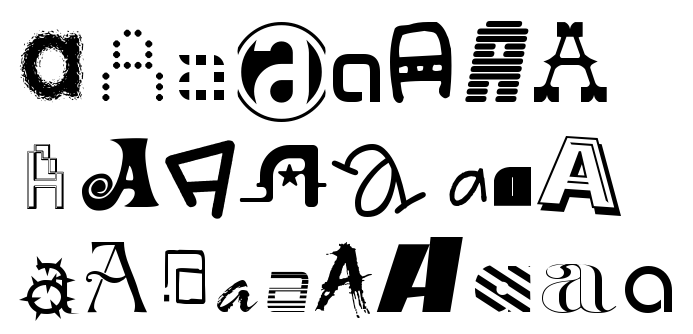

We've prepared a Jupyter notebook that will guide you through the process of creating a single layer neural network in TensorFlow.

### The Notebook
The notebook has 3 problems for you to solve:

    Problem 1: Normalize the features
    Problem 2: Use TensorFlow operations to create features, labels, weight, and biases tensors
    Problem 3: Tune the learning rate, number of steps, and batch size for the best accuracy

This is a self-assessed lab. Compare your answers to the solutions in the **solutions.ipynb** . If you have any difficulty completing the lab, Udacity provides a few services to answer any questions you might have.
